<a href="https://colab.research.google.com/github/Linajbjdfh/Data-Engineering-and-Machine-Learning-Operations/blob/main/Assignment2%20-%20EDA%20with%20Polars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark --q
!pip install polars --q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 63.7 MB/s eta 0:00:00


***Loading and checking the structure of the data***

In [ ]:
import polars as pl


In [ ]:
df=pl.read_csv("/content/HR_comma_sep.csv")

In [ ]:
df.head()

satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
f64,f64,i64,i64,i64,i64,i64,i64,str,str
0.38,0.53,2,157,3,0,1,0,"""sales""","""low"""
0.8,0.86,5,262,6,0,1,0,"""sales""","""medium"""
0.11,0.88,7,272,4,0,1,0,"""sales""","""medium"""
0.72,0.87,5,223,5,0,1,0,"""sales""","""low"""
0.37,0.52,2,159,3,0,1,0,"""sales""","""low"""


In [ ]:
df.dtypes

[Float64, Float64, Int64, Int64, Int64, Int64, Int64, Int64, Utf8, Utf8]

In [ ]:
df.columns 

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'sales',
 'salary']

In [ ]:
df.rows()

[(0.38, 0.53, 2, 157, 3, 0, 1, 0, 'sales', 'low'),
 (0.8, 0.86, 5, 262, 6, 0, 1, 0, 'sales', 'medium'),
 (0.11, 0.88, 7, 272, 4, 0, 1, 0, 'sales', 'medium'),
 (0.72, 0.87, 5, 223, 5, 0, 1, 0, 'sales', 'low'),
 (0.37, 0.52, 2, 159, 3, 0, 1, 0, 'sales', 'low'),
 (0.41, 0.5, 2, 153, 3, 0, 1, 0, 'sales', 'low'),
 (0.1, 0.77, 6, 247, 4, 0, 1, 0, 'sales', 'low'),
 (0.92, 0.85, 5, 259, 5, 0, 1, 0, 'sales', 'low'),
 (0.89, 1.0, 5, 224, 5, 0, 1, 0, 'sales', 'low'),
 (0.42, 0.53, 2, 142, 3, 0, 1, 0, 'sales', 'low'),
 (0.45, 0.54, 2, 135, 3, 0, 1, 0, 'sales', 'low'),
 (0.11, 0.81, 6, 305, 4, 0, 1, 0, 'sales', 'low'),
 (0.84, 0.92, 4, 234, 5, 0, 1, 0, 'sales', 'low'),
 (0.41, 0.55, 2, 148, 3, 0, 1, 0, 'sales', 'low'),
 (0.36, 0.56, 2, 137, 3, 0, 1, 0, 'sales', 'low'),
 (0.38, 0.54, 2, 143, 3, 0, 1, 0, 'sales', 'low'),
 (0.45, 0.47, 2, 160, 3, 0, 1, 0, 'sales', 'low'),
 (0.78, 0.99, 4, 255, 6, 0, 1, 0, 'sales', 'low'),
 (0.45, 0.51, 2, 160, 3, 1, 1, 1, 'sales', 'low'),
 (0.76, 0.89, 5, 262, 5, 0, 1

In [ ]:
rowCount = df.shape[0]
print("Total number of rows in the dataset:", rowCount)

Total number of rows in the dataset: 14999


Filterig the data

In [ ]:
unique_job=df['sales'].n_unique()
print("Number of unique values in the 'sales' column:", unique_job)


Number of unique values in the 'sales' column: 10


In [ ]:
#Mean body mass of penguins
mean_average_montly_hours = df.groupby('average_montly_hours').mean()
mean_average_montly_hours['average_montly_hours']

average_montly_hours
i64
304
216
122
142
178
104
154
200
150


In [ ]:
#Showing the min and max working hours for each salary level
hours_by_salary = df.groupby('salary').agg([pl.col('average_montly_hours').min().alias('average_montly_hours_min'), pl.col('average_montly_hours').max().alias('average_montly_hours_max')])
hours_by_salary

salary,average_montly_hours_min,average_montly_hours_max
str,i64,i64
"""low""",96,310
"""high""",96,307
"""medium""",96,310


In [ ]:
#Selecting the columns
df.select(pl.col(['satisfaction_level', 'average_montly_hours', 'promotion_last_5years'])) 

satisfaction_level,average_montly_hours,promotion_last_5years
f64,i64,i64
0.38,157,0
0.8,262,0
0.11,272,0
0.72,223,0
0.37,159,0
0.41,153,0
0.1,247,0
0.92,259,0
0.89,224,0


In [ ]:
#Filtering
df.filter(pl.col('number_project') > 5)

satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
f64,f64,i64,i64,i64,i64,i64,i64,str,str
0.11,0.88,7,272,4,0,1,0,"""sales""","""medium"""
0.1,0.77,6,247,4,0,1,0,"""sales""","""low"""
0.11,0.81,6,305,4,0,1,0,"""sales""","""low"""
0.11,0.83,6,282,4,0,1,0,"""sales""","""low"""
0.09,0.95,6,304,4,0,1,0,"""sales""","""low"""
0.09,0.62,6,294,4,0,1,0,"""accounting""","""low"""
0.1,0.94,6,255,4,0,1,0,"""technical""","""low"""
0.11,0.89,6,306,4,0,1,0,"""technical""","""low"""
0.1,0.8,7,281,4,0,1,0,"""technical""","""low"""


In [ ]:
#Selecting column and sorting it by
df.select(
    pl.col(['salary',"sales"]).sort_by('salary', descending=True)    
)

salary,sales
str,str
"""medium""","""sales"""
"""medium""","""sales"""
"""medium""","""management"""
"""medium""","""IT"""
"""medium""","""IT"""
"""medium""","""IT"""
"""medium""","""IT"""
"""medium""","""IT"""
"""medium""","""product_mng"""


In [ ]:
#Seletcing by datatypes
df.select(
    [pl.col(pl.Utf8)]
)

sales,salary
str,str
"""sales""","""low"""
"""sales""","""medium"""
"""sales""","""medium"""
"""sales""","""low"""
"""sales""","""low"""
"""sales""","""low"""
"""sales""","""low"""
"""sales""","""low"""
"""sales""","""low"""


In [ ]:
#Selecting by a row
df.row(10)

(0.45, 0.54, 2, 135, 3, 0, 1, 0, 'sales', 'low')

In [ ]:
df.filter(
    pl.col('sales') == 'IT'
)

satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
f64,f64,i64,i64,i64,i64,i64,i64,str,str
0.11,0.93,7,308,4,0,1,0,"""IT""","""medium"""
0.1,0.95,6,244,5,0,1,0,"""IT""","""medium"""
0.36,0.56,2,132,3,0,1,0,"""IT""","""medium"""
0.11,0.94,6,286,4,0,1,0,"""IT""","""medium"""
0.81,0.7,6,161,4,0,1,0,"""IT""","""medium"""
0.74,0.99,2,277,3,0,1,0,"""IT""","""medium"""
0.74,1.0,4,249,5,0,1,0,"""IT""","""low"""
0.73,0.87,5,257,5,0,1,0,"""IT""","""low"""
0.09,0.96,6,245,4,0,1,0,"""IT""","""low"""


In [ ]:
#Selecting rows and columns
df.filter(pl.col('sales') == 'IT').select(['satisfaction_level', 'average_montly_hours'])

satisfaction_level,average_montly_hours
f64,i64
0.11,308
0.1,244
0.36,132
0.11,286
0.81,161
0.74,277
0.74,249
0.73,257
0.09,245


In [ ]:
df.filter(pl.col("average_montly_hours") > 200).groupby("salary", maintain_order=True).agg(pl.all().sum())

salary,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales
str,f64,f64,i64,i64,i64,i64,i64,i64,str
"""medium""",2036.65,2477.04,13633,793117,11981,477,738,106,null
"""low""",2211.58,2799.88,15511,888490,13266,513,1145,27,null
"""high""",400.46,453.13,2407,148753,2295,83,32,32,null


In [ ]:
#Average satisfaction level based on job position
avg = df.groupby(pl.col('sales')).agg(pl.col('satisfaction_level').mean())
avg

sales,satisfaction_level
str,f64
"""technical""",0.607897
"""support""",0.6183
"""hr""",0.598809
"""marketing""",0.618601
"""sales""",0.614447
"""IT""",0.618142
"""management""",0.621349
"""RandD""",0.619822
"""accounting""",0.582151


In [ ]:
df.head()

satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
f64,f64,i64,i64,i64,i64,i64,i64,str,str
0.38,0.53,2,157,3,0,1,0,"""sales""","""low"""
0.8,0.86,5,262,6,0,1,0,"""sales""","""medium"""
0.11,0.88,7,272,4,0,1,0,"""sales""","""medium"""
0.72,0.87,5,223,5,0,1,0,"""sales""","""low"""
0.37,0.52,2,159,3,0,1,0,"""sales""","""low"""


In [ ]:
#Showing the overall number of projecs based on the job position
overall = df.groupby('sales').agg(pl.col('number_project').sum()).sort(by='number_project', reverse=True).head(4)
overall

<ipython-input-27-4afe5a1644ed>:2: DeprecationWarning: `reverse` is deprecated as an argument to `sort`; use `descending` instead.
  overall = df.groupby('sales').agg(pl.col('number_project').sum()).sort(by='number_project', reverse=True).head(4)


sales,number_project
str,i64
"""sales""",15634
"""technical""",10548
"""support""",8479
"""IT""",4683


#Vizualization

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#Violin plot 1

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f89cc048be0>],
 'cmeans': <matplotlib.collections.LineCollection at 0x7f89cc048a60>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f89cc05a0d0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f89cc05a430>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f89cc05a790>}

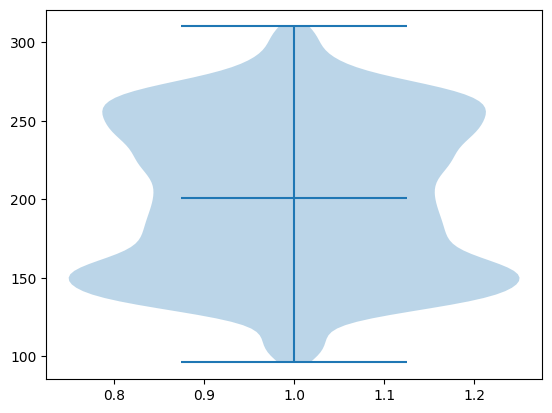

In [ ]:
plt.violinplot(df['average_montly_hours'], showmeans=True)

###Violin Plot 2


{'bodies': [<matplotlib.collections.PolyCollection at 0x7f89cc14da00>],
 'cmeans': <matplotlib.collections.LineCollection at 0x7f89cc14d9a0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f89cc14dfd0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f89cc15f370>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f89cc15f6d0>}

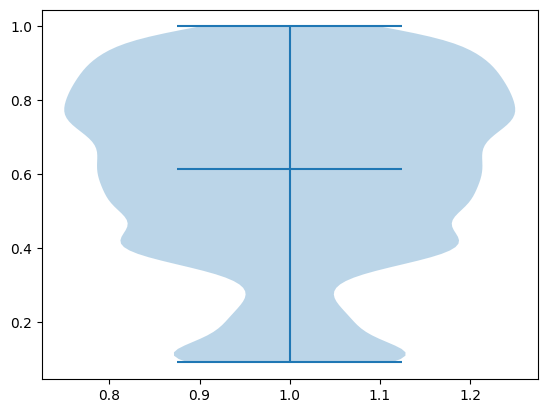

In [ ]:
plt.violinplot(df['satisfaction_level'], showmeans=True)

###Bar chart

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


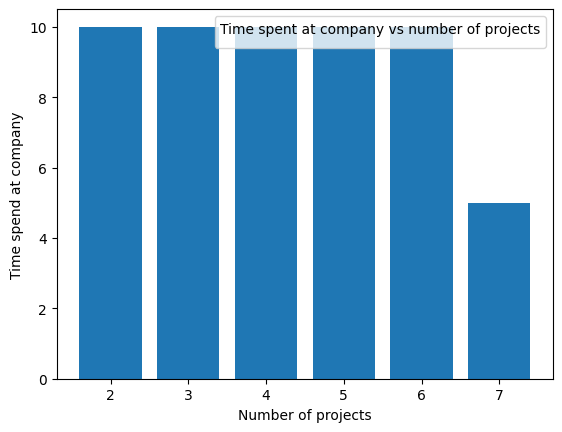

In [ ]:
x = df['number_project']
y = df['time_spend_company']

fig, ax = plt.subplots()

ax.bar(x, y)

ax.set_ylabel('Time spend at company')
ax.set_xlabel('Number of projects')
ax.legend(title='Time spent at company vs number of projects')

plt.show()

###Pie Chart

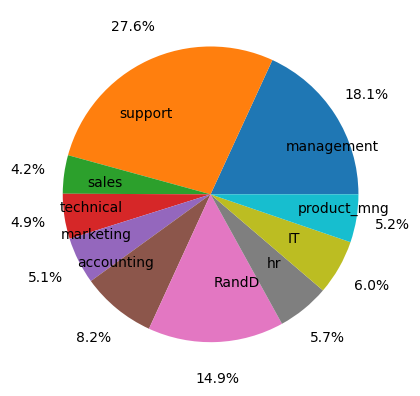

In [ ]:
# Pie chart to show the percentage of employees in each department.
df2=df["sales"].value_counts()
df2["counts"]

labels =list( df["sales"].unique())
y = list(df2["counts"])
fig, ax = plt.subplots()

plt.pie(y, labels = labels,autopct='%1.1f%%',
       pctdistance=1.25, labeldistance=.6)
plt.show()